# LSE Machine Learning: Practical Applications
## Module 2 Unit 2 IDE Activity (assessment)
### In this IDE activity, you are required to apply the different steps of the machine learning pipeline to estimate and evaluate the model fit of both KNN and polynomial regression models.
The instructions are positioned as text cells throughout this notebook before each step. As a result, you are required to first read the text cells above a code cell, familiarise yourself with the required step, and execute the step. Note that you are only required to execute some of the steps throughout the notebook. You are encouraged to refer to Video 1 in this unit's lesson to familiarise yourself with executing the machine learning pipeline in R.

# Data set 1: Wine quality data set
In the first section of the assessment, you are required to apply the machine learning pipeline to the wine quality data set. Based on the type of data, the KNN classifier should be fitted onto this data set to produce the output.

1. Load in the relevant data set.

In [1]:

library(data.table)
data <- fread("Wine quality.csv")
data<-data[ , wine :=as.factor(wine)]




2. Analyse the structure of the data.

In [2]:
str(data)

Classes ‘data.table’ and 'data.frame':	6497 obs. of  13 variables:
 $ fixed.acidity       : num  6.2 6.2 7 10.4 6.2 5.6 7.1 8.2 6.5 6.3 ...
 $ volatile.acidity    : num  0.28 0.33 0.32 0.64 0.28 0.49 0.21 0.38 0.18 0.28 ...
 $ citric.acid         : num  0.33 0.19 0.24 0.24 0.27 0.13 0.37 0.32 0.26 0.29 ...
 $ residual.sugar      : num  1.7 5.6 6.2 2.8 10.3 4.5 2.4 2.5 1.4 6.8 ...
 $ chlorides           : num  0.029 0.042 0.048 0.105 0.03 0.039 0.026 0.08 0.041 0.051 ...
 $ free.sulfur.dioxide : num  24 22 31 29 26 17 23 24 40 40 ...
 $ total.sulfur.dioxide: num  111 143 228 53 108 116 100 71 141 143 ...
 $ density             : num  0.99 0.994 0.996 1 0.994 ...
 $ pH                  : num  3.24 3.15 3.23 3.24 3.2 3.42 3.15 3.27 3.34 3.43 ...
 $ sulphates           : num  0.5 0.63 0.62 0.67 0.36 0.9 0.38 0.85 0.72 0.59 ...
 $ alcohol             : num  12.1 9.9 9.4 9.9 10.7 13.7 11.4 11 9.5 11 ...
 $ quality             : int  6 5 6 5 6 7 7 6 6 6 ...
 $ wine                : Factor w/ 

3. Load the caret and dplyr() packages to estimate KNN models.

In [3]:
library(caret)
library(dplyr)

Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




4. Separate the variables into predictor and predicted variables using the dplyr `select()` function, and convert the predicted variable into a factor.

In [4]:
y <- data$wine
y <- as.factor(y)
x <- data %>% select(-wine)

5. Estimate a model with *k* = 5, generate predictions, and produce the confusion matrix.

In [5]:
knn_model <- knn3(x, y, k = 5)
knn_pred <- predict(knn_model, data[, -13], type = "class")
confusionMatrix(knn_pred,y)

Confusion Matrix and Statistics

          Reference
Prediction  red white
     red   1433    91
     white  166  4807
                                          
               Accuracy : 0.9604          
                 95% CI : (0.9554, 0.9651)
    No Information Rate : 0.7539          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8917          
                                          
 Mcnemar's Test P-Value : 3.912e-06       
                                          
            Sensitivity : 0.8962          
            Specificity : 0.9814          
         Pos Pred Value : 0.9403          
         Neg Pred Value : 0.9666          
             Prevalence : 0.2461          
         Detection Rate : 0.2206          
   Detection Prevalence : 0.2346          
      Balanced Accuracy : 0.9388          
                                          
       'Positive' Class : red             
                     

6. Repeat Instruction 5, but with *k* = 3.

In [6]:
knn_model <- knn3(wine ~., data = data, k = 3)
knn_pred <- predict(knn_model, data[, -13], type = "class")
confusionMatrix(knn_pred, data$wine)

Confusion Matrix and Statistics

          Reference
Prediction  red white
     red   1495    81
     white  104  4817
                                          
               Accuracy : 0.9715          
                 95% CI : (0.9672, 0.9754)
    No Information Rate : 0.7539          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9229          
                                          
 Mcnemar's Test P-Value : 0.1058          
                                          
            Sensitivity : 0.9350          
            Specificity : 0.9835          
         Pos Pred Value : 0.9486          
         Neg Pred Value : 0.9789          
             Prevalence : 0.2461          
         Detection Rate : 0.2301          
   Detection Prevalence : 0.2426          
      Balanced Accuracy : 0.9592          
                                          
       'Positive' Class : red             
                     

7. Create a variable of the tuning parameters to be odd values between *k* = 3 and *k* = 25.

In [7]:
hyper_grid <- expand.grid(k = seq(3, 25, by = 2))

8. Create the control for the cross-validation of the leave-out-one-group cross-validation method with 70% of the group used for training (no repetitions). Create a control to save the predictions. Note: The value of *p* should be 0.7 if only 70% of the group is used to train the model.

In [8]:
set.seed(12345)
ctrl<-trainControl(method="LGOCV",
                  p=0.7,
                  number=1,
                  savePredictions=TRUE)


9. Estimate the models across the tuning parameters and generate the output of the estimation, as well as a plot.

k-Nearest Neighbors 

6497 samples
  12 predictor
   2 classes: 'red', 'white' 

No pre-processing
Resampling: Repeated Train/Test Splits Estimated (1 reps, 70%) 
Summary of sample sizes: 4549 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   3  0.9394251  0.8350387
   5  0.9419918  0.8400973
   7  0.9399384  0.8341985
   9  0.9399384  0.8344370
  11  0.9378850  0.8282828
  13  0.9353183  0.8202797
  15  0.9358316  0.8218352
  17  0.9342916  0.8168961
  19  0.9337782  0.8153313
  21  0.9317248  0.8093277
  23  0.9301848  0.8054521
  25  0.9332649  0.8140351

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.

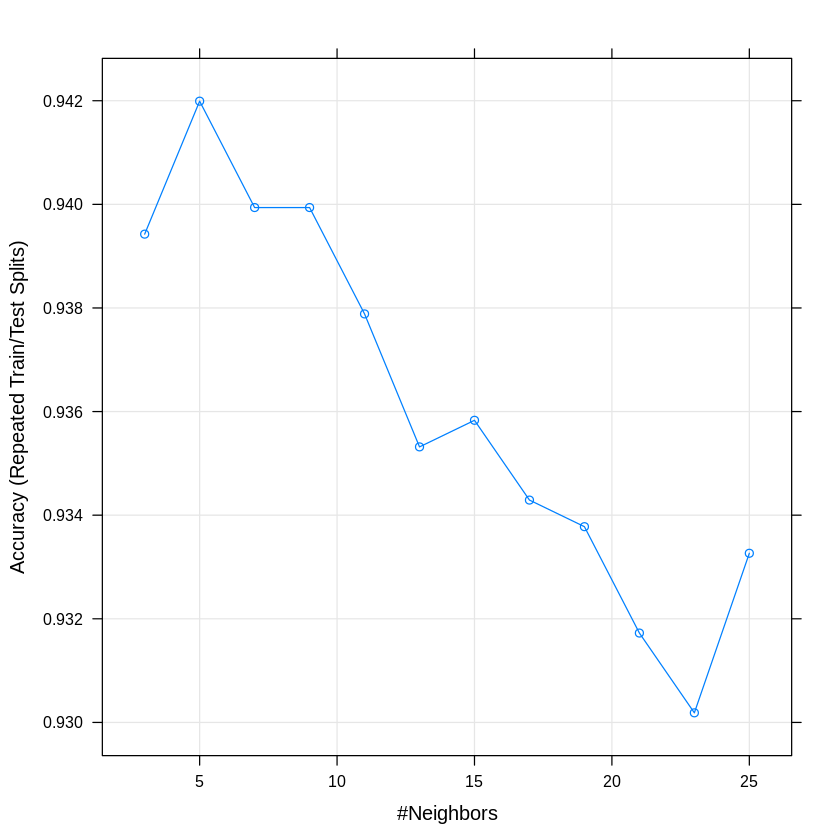

In [9]:
knn_models <- train(x, y, method="knn", tuneGrid=hyper_grid, trControl=ctrl)
knn_models
plot(knn_models)

# Data set 2: Combined cycle power plant
In the second section of the assessment, you are required to apply the steps of the machine learning pipeline to the combined cycle power plant (CCPP) data set. Due to the nature of the data, polynomial regression should be used.

1. Load the relevant data set.

In [10]:
data <- read.csv("Combined cycle power plant.csv")

2. Load the ISLR package and view the structure of the data.

In [11]:
library(ISLR)
str(data)

'data.frame':	47840 obs. of  5 variables:
 $ AT: num  14.96 25.18 5.11 20.86 10.82 ...
 $ V : num  41.8 63 39.4 57.3 37.5 ...
 $ AP: num  1024 1020 1012 1010 1009 ...
 $ RH: num  73.2 59.1 92.1 76.6 96.6 ...
 $ PE: num  463 444 489 446 474 ...


3. The variable that should be predicted is _**PE**_. _**V**_ is the predictor
variable. Select the features _**PE**_ and _**V**_ from the data set.

In [12]:
PE <- data$PE
V <- data$V

4. Plot _**PE**_ against _**V**_.

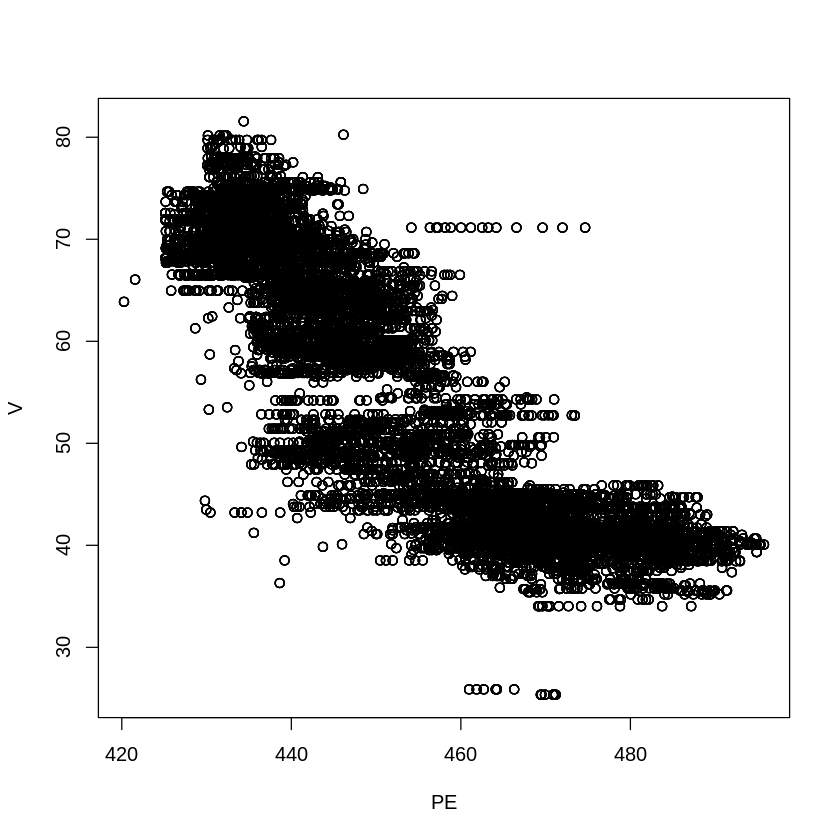

In [13]:
# YOUR CODE HERE
plot(PE,V)

5. Create polynomial data of _**V**_ to the polynomial order 3.

In [14]:
poly_v<-poly(V,3)

6. Estimate the polynomial regression and generate the summary statistics.

In [15]:
poly_reg <- lm(PE ~ poly_v)
summary(poly_reg)


Call:
lm(formula = PE ~ poly_v)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.529  -4.983  -0.160   5.251  38.418 

Coefficients:
              Estimate Std. Error   t value Pr(>|t|)    
(Intercept)  4.544e+02  3.701e-02 12276.594  < 2e-16 ***
poly_v1     -3.247e+03  8.095e+00  -401.067  < 2e-16 ***
poly_v2      5.058e+02  8.095e+00    62.483  < 2e-16 ***
poly_v3      4.462e+01  8.095e+00     5.512 3.57e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.095 on 47836 degrees of freedom
Multiple R-squared:  0.775,	Adjusted R-squared:  0.775 
F-statistic: 5.493e+04 on 3 and 47836 DF,  p-value: < 2.2e-16


7. Create polynomial data of _**V**_ to the polynomial order 10, estimate the polynomial regression, and generate the summary statistics.

In [16]:
poly_v<-poly(V,10)
poly_reg <- lm(PE ~ poly_v)
summary(poly_reg)


Call:
lm(formula = PE ~ poly_v)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.612  -4.950  -0.322   4.967  39.427 

Coefficients:
              Estimate Std. Error   t value Pr(>|t|)    
(Intercept)   454.3650     0.0354 12836.071  < 2e-16 ***
poly_v1     -3246.6803     7.7423  -419.345  < 2e-16 ***
poly_v2       505.8034     7.7423    65.330  < 2e-16 ***
poly_v3        44.6193     7.7423     5.763 8.31e-09 ***
poly_v4      -255.2895     7.7423   -32.973  < 2e-16 ***
poly_v5       334.4187     7.7423    43.194  < 2e-16 ***
poly_v6       101.0293     7.7423    13.049  < 2e-16 ***
poly_v7      -274.9004     7.7423   -35.506  < 2e-16 ***
poly_v8        14.1416     7.7423     1.827   0.0678 .  
poly_v9        46.9824     7.7423     6.068 1.30e-09 ***
poly_v10      -50.3367     7.7423    -6.502 8.03e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.742 on 47829 degrees of freedom
Multiple R-squared:  0.7942,	Adjusted R-squared

8. Load the caret package.

In [17]:
library(caret)

9. Set up the cross-validation parameters such that *k*-fold repeated cross-validation is used in accordance with the following specifics: 5 folds and 2 repeats. Save the values.

In [18]:
set.seed(12345)
fitControl<-trainControl(method="repeatedcv",
                        number=5,
                        repeats=2)

10. Create an object for the R-squared variable.

In [19]:
R2 <- c()

11. Create a for loop that estimates the model across tuning parameters of a polynomial of order 1 to order 10.

In [20]:
for (d in 1:10) {
    f <- bquote(PE ~ poly(V, .(d)))
    LinearRegressor <- caret::train(as.formula(f), data = data, method = "lm",trControl = fitControl)
    R2 <- c(R2, LinearRegressor$results$Rsquared)
}



12. Print out the R-squared value across various tuning parameters, as well as a line plot.

 [1] 0.7565368 0.7748835 0.7749972 0.7796931 0.7877109 0.7884480 0.7938740
 [8] 0.7938888 0.7940270 0.7941988


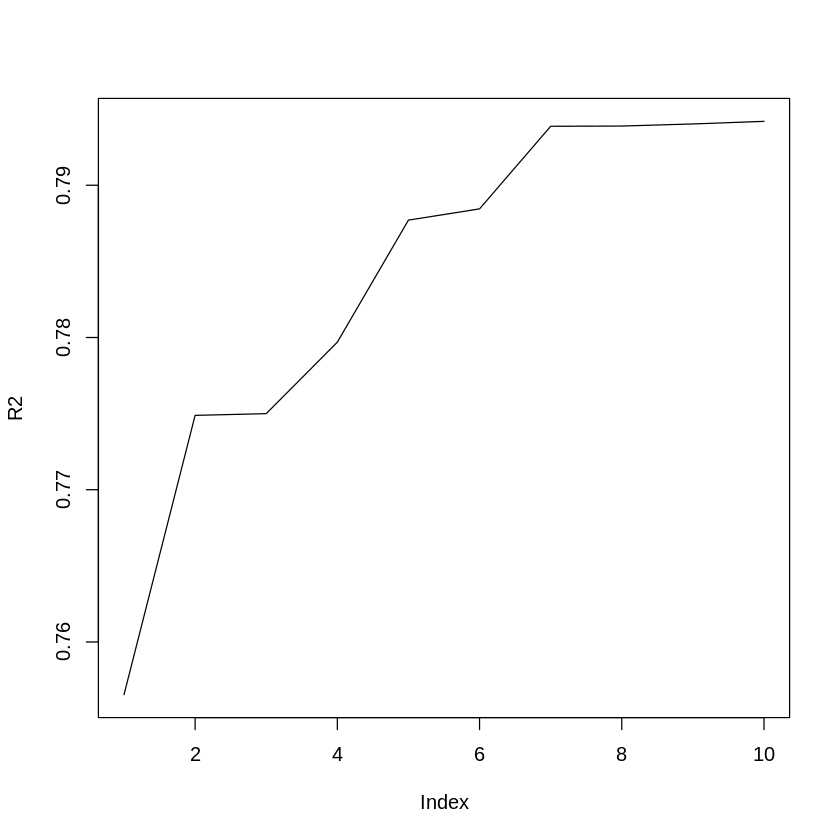

In [21]:
# YOUR CODE HERE
print(R2)
plot(R2, type="l")




**NOTE:** Remember to submit this IDE activity after completion, and navigate to the next component to share your thoughts and reflections with your peers in the small group discussion forum.